# Handwritten Digit Recognition

In [171]:
from datasets import load_dataset
import pandas as pd
from PIL import Image
import io
import base64

In [172]:
df = pd.read_parquet("hf://datasets/thoriqtau/Handwritten_Digits_10k/data/train-00000-of-00001.parquet")

In [173]:
df.shape
df.columns
df.describe
df["label"].unique()

array(['0', 'g', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '],
      dtype=object)

Le dataset contient 10789 images de chiffres (0 à 9) écrits à la main. Certaines images ne sont associées à aucun chiffre existant (label " "), mais aussi à la lettre "g".

In [174]:
image_not_digits = df[df["label"]== " "]
image_not_digits

,image,label
9925,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,


On remarque qu'une seule image n'est associée à aucun chiffre.

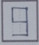

In [175]:
image_not_digits = Image.open(io.BytesIO(image_not_digits.loc[9925]["image"]["bytes"]))
display(image_not_digits)

La seule image sans chiffre associée représente toutefois le 9. On va donc associer ce chiffre à l'image.

In [176]:
df.loc[9925,"label"] = "9"

In [177]:
image_g = df[df["label"] == "g"]
image_g

,image,label
262,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,g
1899,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,g
5641,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,g


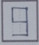

In [178]:
image_g = Image.open(io.BytesIO(image_g.loc[5641]["image"]["bytes"]))
display(image_not_digits)

In [179]:
df.loc[df["label"] == "g", "label"] = "9"
image_g = df[df["label"] == "g"]
image_g

,image,label


In [180]:
df["label"].unique()

array(['0', '9', '1', '2', '3', '4', '5', '6', '7', '8'], dtype=object)

Les labels sont donc bien attribués.

In [181]:
df["image"] = df["image"].str["bytes"] # extrait la valeur associée à la clé "bytes" de chaque dictionnaire de la colonne image
df["image"] = df["image"].map(base64.b64encode).astype(str)
df.head()

,image,label
0,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAw...,0
1,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAw...,0
2,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAw...,0
3,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAw...,0
4,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAw...,0
